In [20]:
# Import necessary libraries including data handling, preprocessing, Principal Component Analysis, logistic regression, and evaluation metrics.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [21]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names


In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Initialize PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [5]:
# Dimensionality reduction into 2 PCA components
principal_component1 = X_pca[:, 0]
principal_component2 = X_pca[:, 1]


In [6]:
# Create a DataFrame for visualization and analysis
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y


In [7]:
# Split the data into training and testing sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Initialize logistic regression model
logreg = LogisticRegression()

In [24]:
 #Train the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Predict on the test data
y_pred = logreg.predict(X_test)

In [11]:
# Evaluate the model: Predicts on the test data and evaluates the model using accuracy score and classification report.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.97


In [12]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



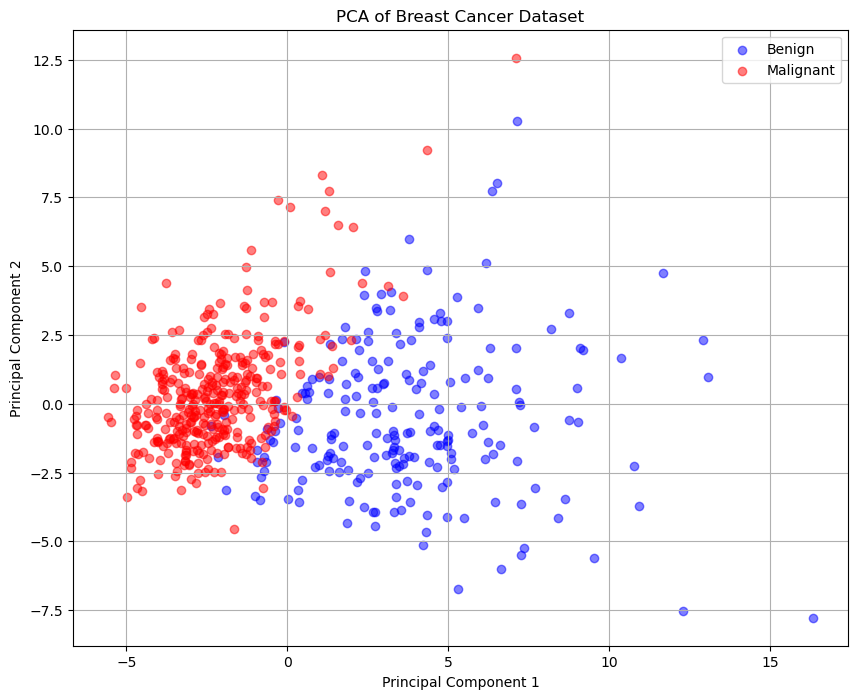

In [13]:
# Visualization: includes code for visualizing the PCA components. 
plt.figure(figsize=(10, 8))
plt.scatter(principal_component1[y == 0], principal_component2[y == 0], color='b', label='Benign', alpha=0.5)
plt.scatter(principal_component1[y == 1], principal_component2[y == 1], color='r', label='Malignant', alpha=0.5)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#Summary:
#Dataset: The breast cancer dataset is from sklearn.datasets.
#By using PCA Technique and Logistic Regression, the model developed addresses the increasing number of referrals at Anderson Cancer Clinic through:
#i) Dimensionality reduction:Through PCA, this model while reducing the complexity of the dataset also retains essential information, thereby enabling the Clinic focus on areas or factors necessary for improvement.
#ii) Logistic Regression enables the Clinic predict (with an accuracy of 97%) outcomes such as: patient survival rates, etc. This will help the Clinic prioritize referrals and allocate its resources to patients that need it the most (e.g. patients in critical cancer stages).
